<a href="https://colab.research.google.com/github/utkuyucel/Deep-Learning/blob/master/Keras_Functional_API_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from keras import layers
from keras.layers import Dense, Input, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils, to_categorical, plot_model
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from keras.datasets import cifar10

In [0]:
## THE DATASET PART ##
(X_train, y_train),(X_test, y_test) = cifar10.load_data()

X_train = X_train / 255.
X_test = X_test / 255.

X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

y_train = to_categorical(y_train, 10, )
y_test = to_categorical(y_test, 10)


In [0]:
## DEFINING THE MODEL ##

def model(input_shape):
  
  X_input = Input(input_shape)
  
  X = ZeroPadding2D((3,3))(X_input)
  
  X = Conv2D(128, (7,7), strides = (1,1), name = "conv0")(X)
  X = BatchNormalization(axis = 3, name = "bn0")(X)
  X = Activation("relu")(X)
  X = Conv2D(128, (7,7), strides = (1,1), name = "conv1")(X)
  X = BatchNormalization(axis = 3, name = "bn1")(X)
  X = Activation("relu")(X)
  X = Conv2D(128, (7,7), strides = (1,1), name = "conv2")(X)
  X = BatchNormalization(axis = 3, name = "bn2")(X)
  X = Activation("relu")(X)
  
  X = Conv2D(128, (7,7), strides = (1,1), name = "conv3")(X)
  X = BatchNormalization(axis = 3, name = "bn3")(X)
  X = Activation("relu")(X)
  X = Conv2D(128, (7,7), strides = (1,1), name = "conv4")(X)
  X = BatchNormalization(axis = 3, name = "bn4")(X)
  X = Activation("relu")(X)
  X = Conv2D(128, (7,7), strides = (1,1), name = "conv5")(X)
  X = BatchNormalization(axis = 3, name = "bn5")(X)
  X = Activation("relu")(X)
  
  
  X = MaxPooling2D((2,2), name = "max_pool")(X)
  
  X = Flatten()(X)
  X = Dense(1024, activation = "relu", name = "d1")(X)
  X = BatchNormalization()(X)
  X = Dense(256, activation = "relu", name = "d2")(X)
  
  X = Dense(10, activation = "softmax", name = "fc")(X)
  
  
  model = Model(inputs = X_input, outputs = X)
  return model

In [0]:
model = model(X_train.shape[1:])

In [54]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
zero_padding2d_10 (ZeroPaddi (None, 38, 38, 3)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 32, 32, 128)       18944     
_________________________________________________________________
bn0 (BatchNormalization)     (None, 32, 32, 128)       512       
_________________________________________________________________
activation_14 (Activation)   (None, 32, 32, 128)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 26, 26, 128)       802944    
_________________________________________________________________
bn1 (BatchNormalization)     (None, 26, 26, 128)       512       
__________

In [0]:
model.compile("adam", "categorical_crossentropy", metrics = ["accuracy"])

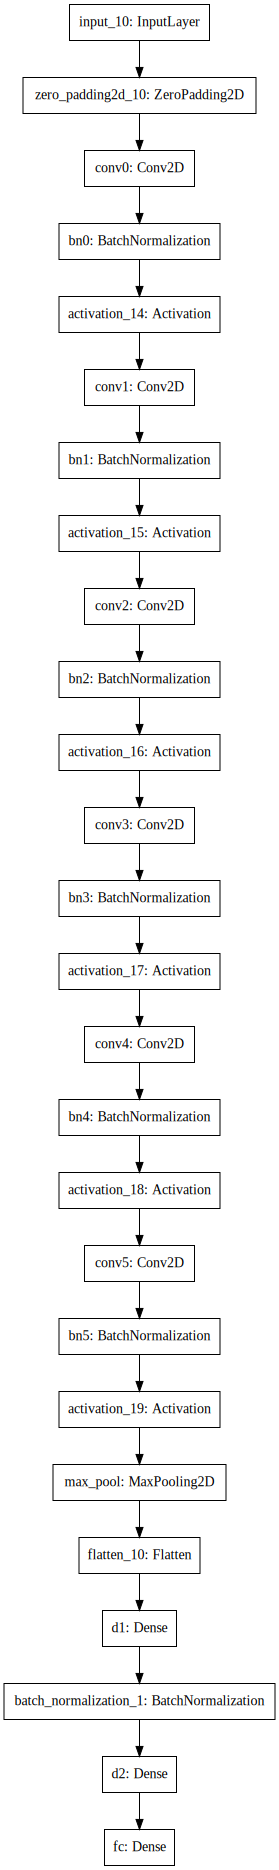

In [56]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

plot_model(model, to_file='model.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))


In [57]:
history = model.fit(X_train, y_train, epochs = 40, batch_size = 50, validation_data = (X_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 51s 1ms/step - loss: 1.7444 - acc: 0.3794 - val_loss: 2.1436 - val_acc: 0.3544
Epoch 2/40
50000/50000 [==============================] - 49s 983us/step - loss: 1.3015 - acc: 0.5369 - val_loss: 2.7981 - val_acc: 0.3232
Epoch 3/40
50000/50000 [==============================] - 50s 1000us/step - loss: 1.0947 - acc: 0.6159 - val_loss: 1.4028 - val_acc: 0.5158
Epoch 4/40
50000/50000 [==============================] - 51s 1ms/step - loss: 0.9368 - acc: 0.6715 - val_loss: 1.1350 - val_acc: 0.6036
Epoch 5/40
50000/50000 [==============================] - 51s 1ms/step - loss: 0.8172 - acc: 0.7166 - val_loss: 1.1764 - val_acc: 0.5947
Epoch 6/40
50000/50000 [==============================] - 51s 1ms/step - loss: 0.7268 - acc: 0.7485 - val_loss: 0.9001 - val_acc: 0.6952
Epoch 7/40
50000/50000 [==============================] - 52s 1ms/step - loss: 0.6450 - acc: 0.7750 - val_loss: 1.1831 - va

KeyboardInterrupt: ignored